In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
my_data=pd.read_csv("Admission_predict.csv")
my_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
my_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
my_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

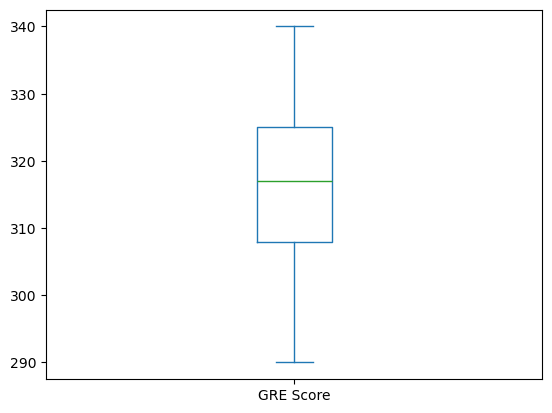

In [6]:
my_data["GRE Score"].plot.box() #object oriented method

In [7]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"box plot of {col}")
    #plt.xlabel(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

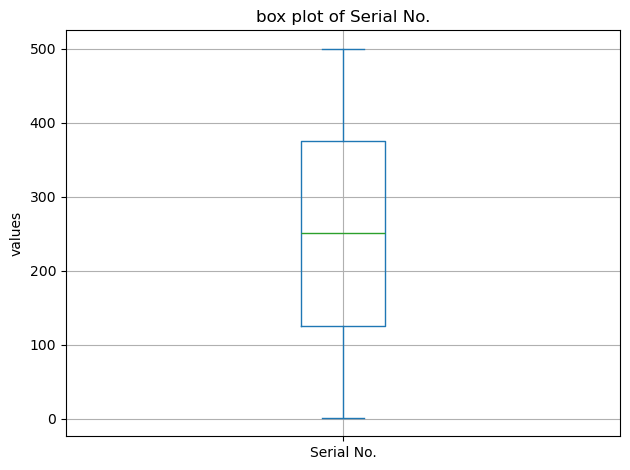

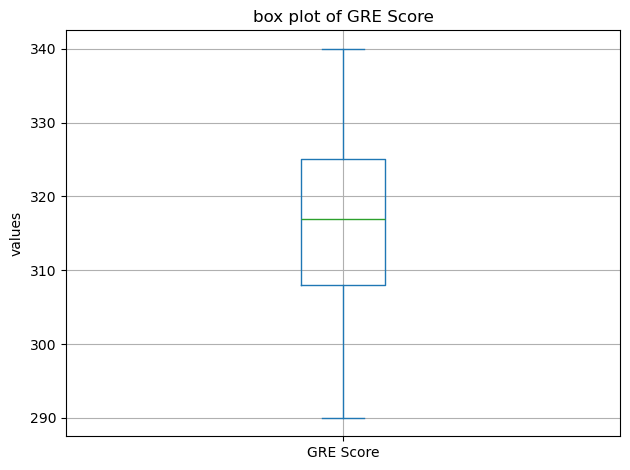

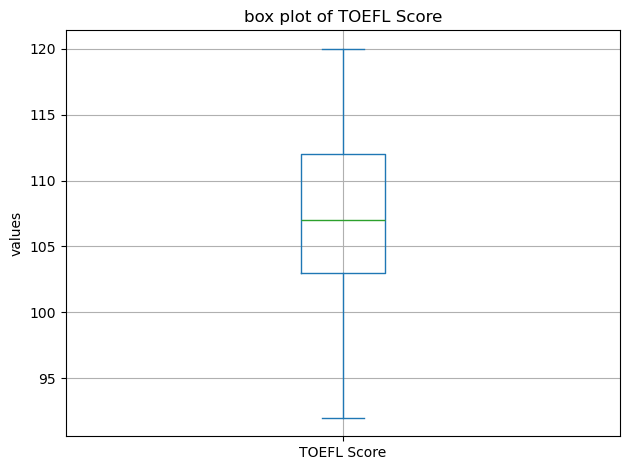

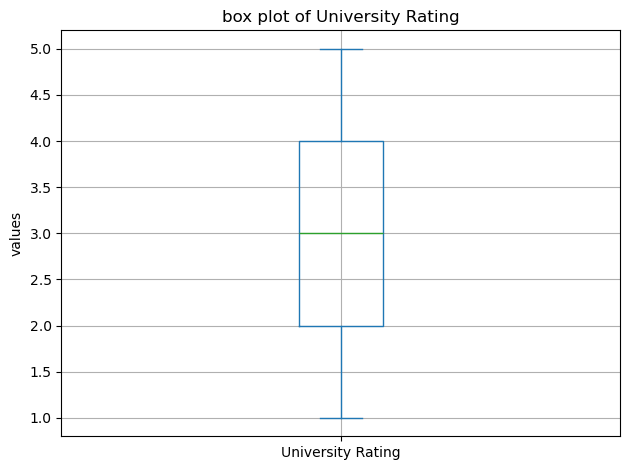

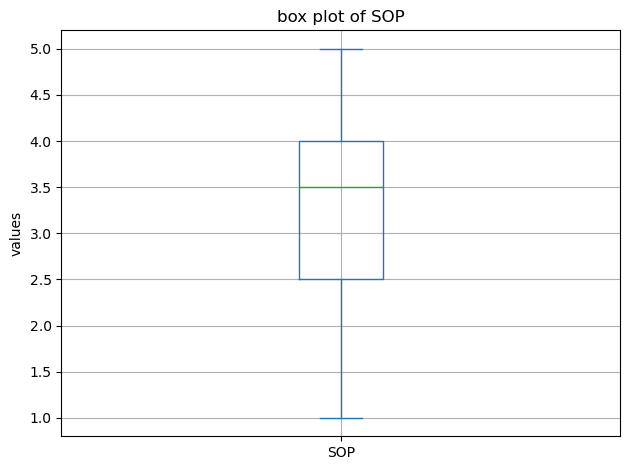

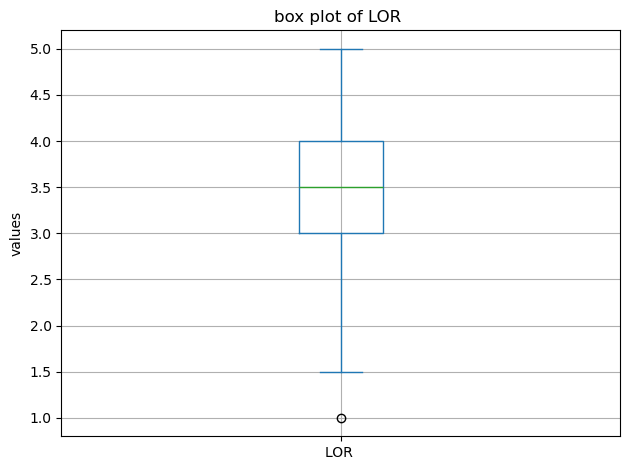

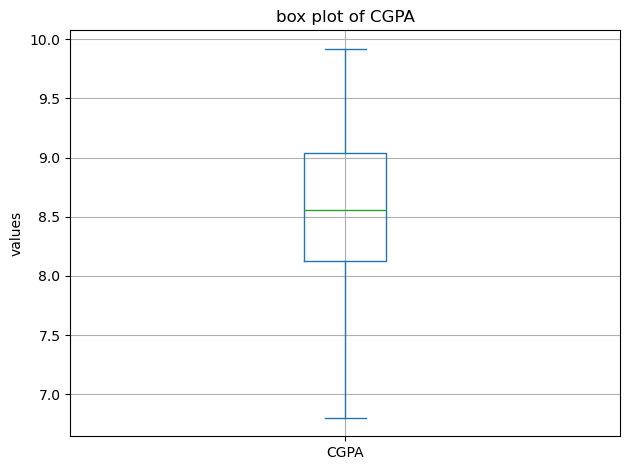

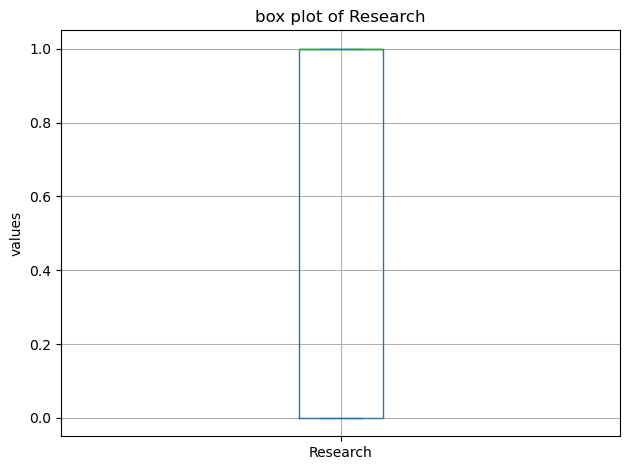

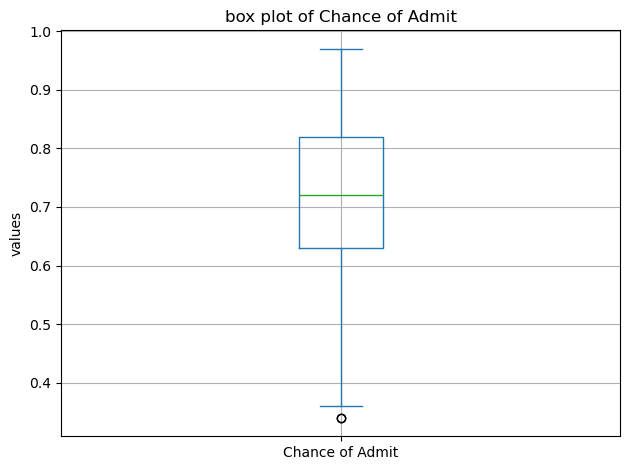

In [8]:
for col in  my_data.columns:
    box_plot(col)

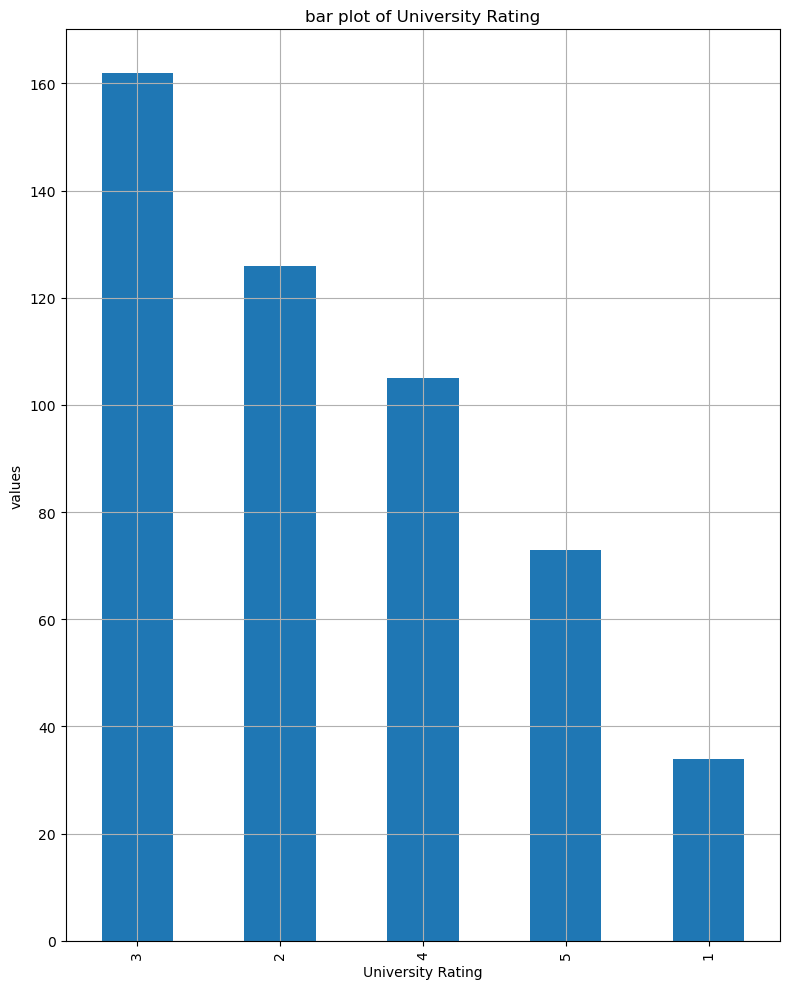

In [9]:
plt.figure(figsize=(8,10))
my_data["University Rating"].value_counts().plot(kind="bar")
plt.title(f"bar plot of University Rating")
#plt.xlabel(col)
plt.ylabel("values")
plt.grid(True)
plt.tight_layout()

In [10]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"bar plot og {col}")
    plt.xticks(fontsize=10)
    #plt,xlable(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

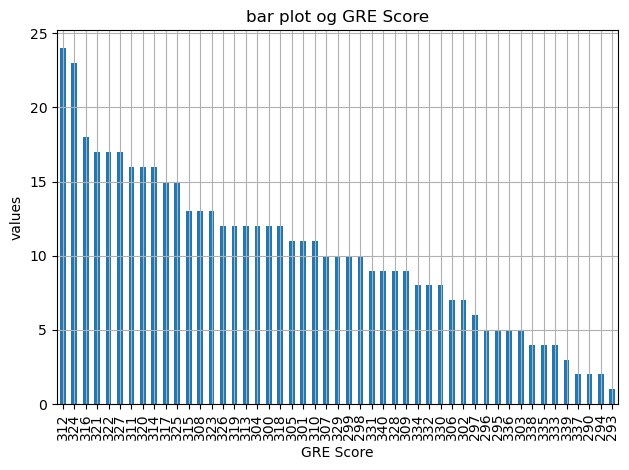

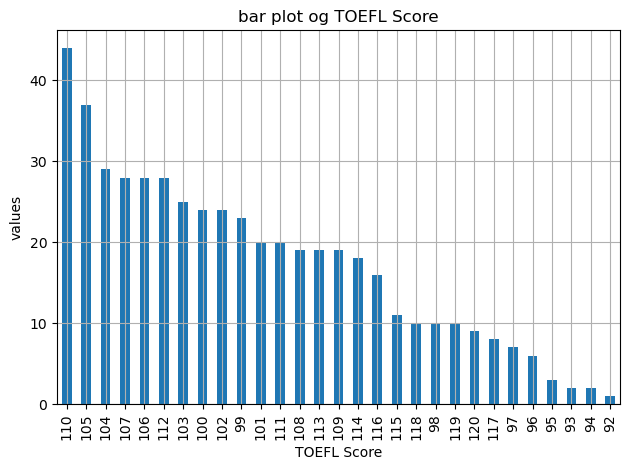

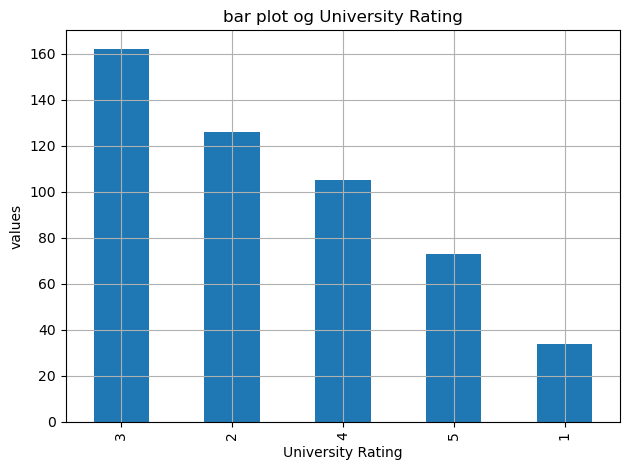

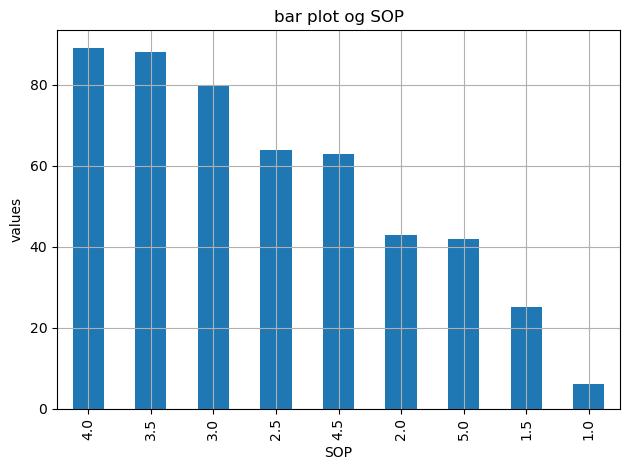

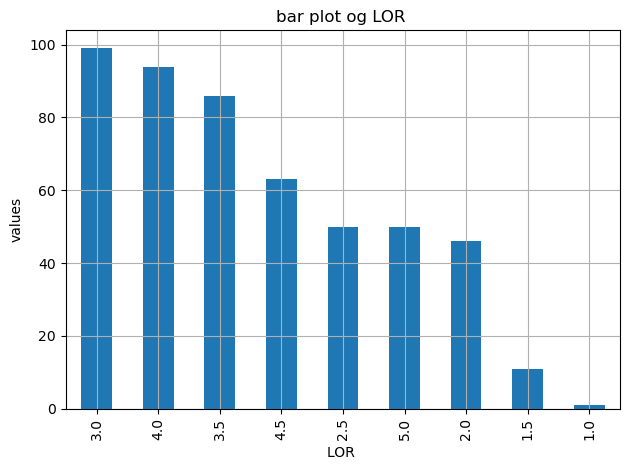

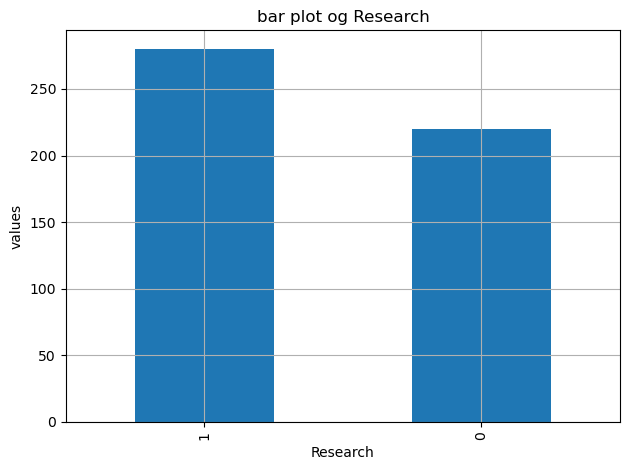

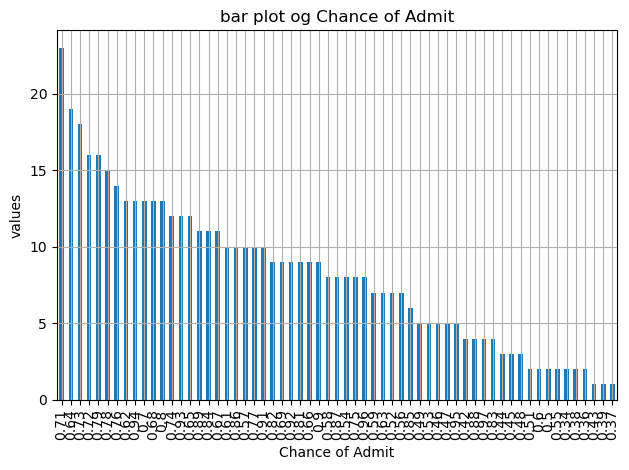

In [11]:
for col in ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','Research','Chance of Admit']:
    bar_plot(col)

In [12]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line")
    plt.title(f"line plot og {col}")
    plt.xticks(fontsize=10)
    #plt,xlable(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

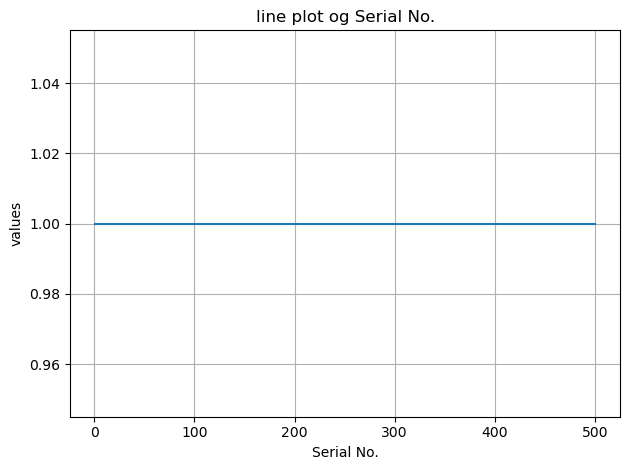

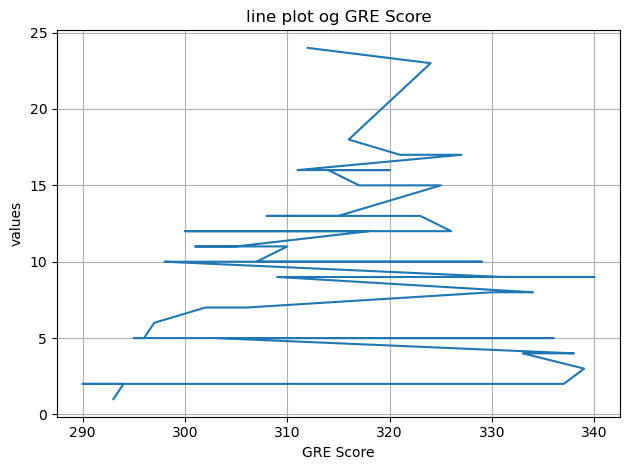

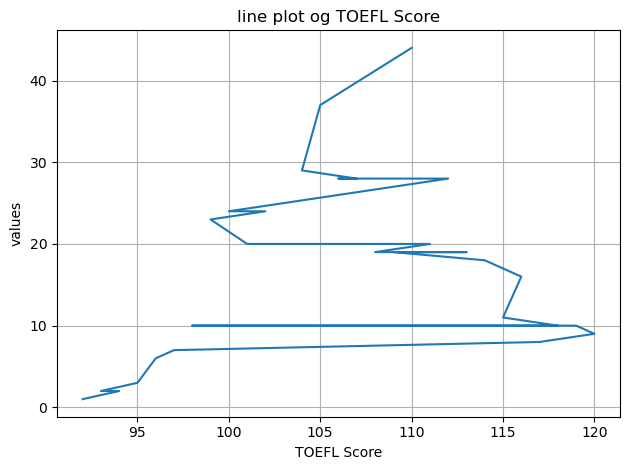

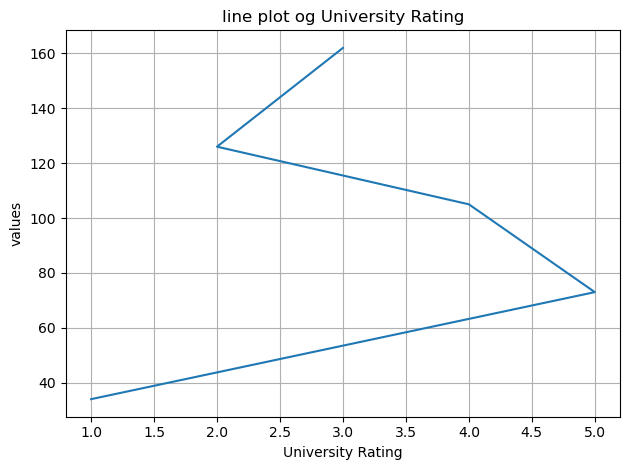

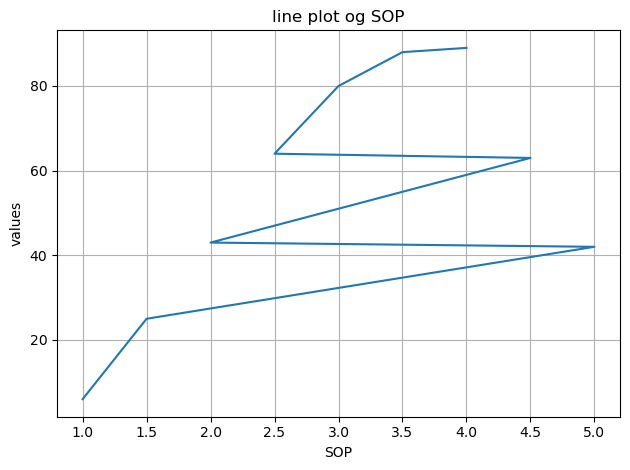

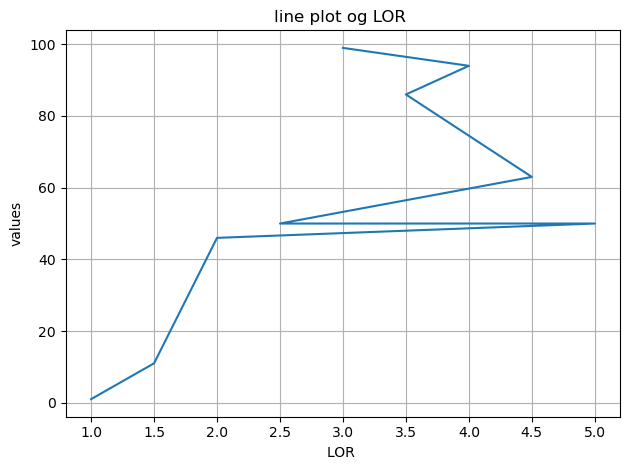

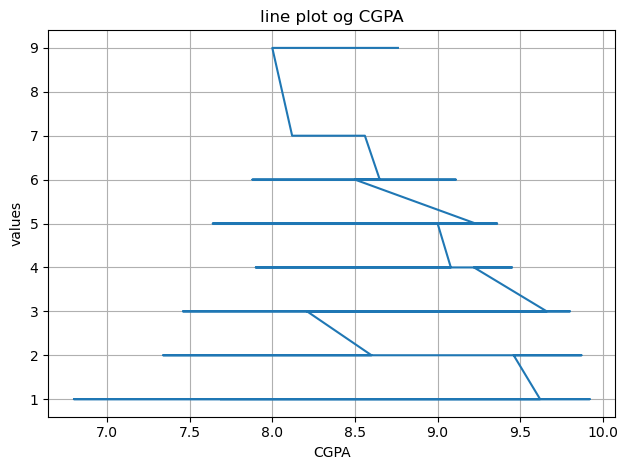

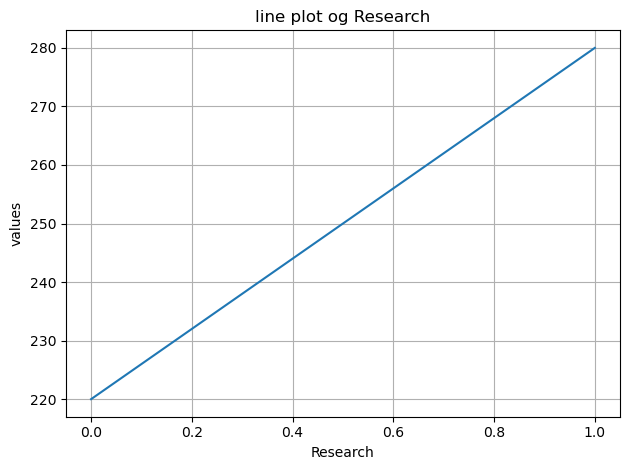

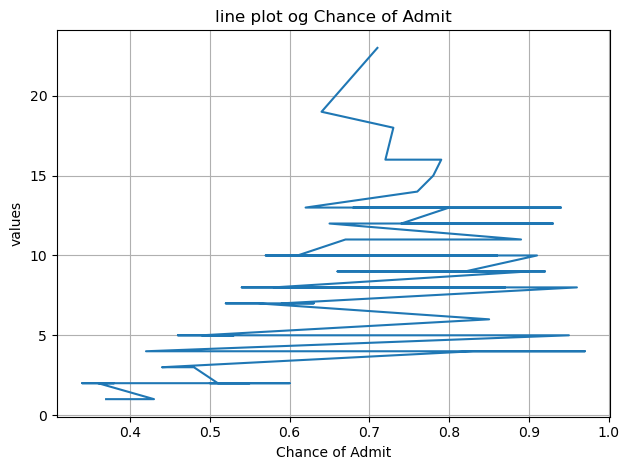

In [14]:
for col in my_data.columns:
    line_plot(col)

In [15]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [16]:
x=my_data.drop(["Chance of Admit","Serial No."],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x testing {x_test.shape}")
print(f"y testing {y_test.shape}")

x training (350, 7)
y training (350,)
x testing (150, 7)
y testing (150,)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [20]:
#train a model
#.fit is a command
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,333,118,5,5.0,5.0,9.35,1
280,311,102,3,4.5,4.0,8.64,1
440,305,104,2,2.5,1.5,7.79,0
384,340,113,4,5.0,5.0,9.74,1
225,296,99,2,2.5,2.5,8.03,0
...,...,...,...,...,...,...,...
17,319,106,3,4.0,3.0,8.00,1
479,325,110,4,4.5,4.0,8.96,1
357,301,104,2,3.5,3.5,7.89,1
332,308,106,3,3.5,2.5,8.21,1


In [22]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.9309531 , 0.72489282, 0.53403236, 0.97671545, 0.54601857,
       0.62187632, 0.81149089, 0.58454954, 0.5074575 , 0.6253587 ,
       0.61977884, 0.54785062, 0.49078767, 0.70620981, 0.52940389,
       0.689215  , 0.51875156, 0.63969492, 0.77379919, 0.88561105,
       0.87390632, 0.76298757, 0.67641026, 0.46333   , 0.78431596,
       0.88874915, 0.73287804, 0.70175186, 0.58397981, 0.61402829,
       0.73417225, 0.97859528, 0.50247354, 0.95880399, 0.68093955,
       0.72037634, 0.79057677, 0.79242859, 0.64357782, 0.68875946,
       0.82762346, 0.9611836 , 0.78446034, 0.94330161, 0.59666375,
       0.75331895, 0.77259854, 0.99624079, 0.88334747, 0.79224222,
       0.60639345, 0.5345322 , 0.91164184, 0.68920765, 0.73825789,
       0.54747819, 0.93290361, 0.73355898, 0.997998  , 0.7562652 ,
       0.59947761, 0.71838848, 0.70153481, 0.95532286, 0.70436121,
       0.67667125, 0.72011201, 0.78987651, 0.64222538, 0.75325503,
       0.65828084, 0.57104088, 0.6171557 , 0.90731242, 0.84049

In [23]:
#checking models performance
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [24]:
mse=mean_squared_error(y_test,y_pred)
print(f"mean squared error is {mse}")
rmse=sqrt(mse)
print(f"root mean squared error is {rmse}")

mean squared error is 0.004135943799205664
root mean squared error is 0.06431130382137859


In [25]:
from sklearn.metrics import r2_score

In [26]:
#r2 is return the perfomance of model
r_squared=r2_score(y_test,y_pred)
print(f"R squared is {r_squared}")

R squared is 0.7888675572145216


In [27]:
#find value of constant(y=mx+c where c is constant)
print(f"constant value is {model_lr.intercept_}")

constant value is -1.4323741707447035


In [28]:
#finding slope value
print(f"slope m1,m2 and m3 {model_lr.coef_}")

slope m1,m2 and m3 [0.00262901 0.00231292 0.00520748 0.00080892 0.0200542  0.11315723
 0.02656773]


In [29]:
#create file and uplod in cloudimport pickle
import pickle
pickle.dump(model_lr,open("mymodel.pkl","wb"))

In [119]:
rf= RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
rf

RandomForestRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=30,
                      n_estimators=20)

In [121]:
param_grid = {
    'n_estimators' : [100,200,300,350],# number of tree in the forest
    'max_depth'    : [None,10,20,30],# maximum depth of he tree
    'min_samples_split': [2,5,10],# minimum number of sample required to split an internal node
    'min_samples_leaf' : [1,2,4], # minimum number of samples reqiured to be at a leaf node
}

In [123]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#n_jobs = -1 for faster computation / parameters combinatitions
grid_search.fit(x_train,y_train)
#get the best hyperparameter
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [41]:
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
             RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)] 

In [85]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"list of rmse {my_rmse}")
    print("-------")
    print(f"list of r square {my_r_square}")
    adj_r_squared_test=1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r2_square_test")
    adj_r2_square_value.append(adj_r_squared_test)
    print(f"adjested r square {adj_r2_square_value} of model {model}")
    print("-------")
    print(f"adjested r square {adj_r2_square_value}")

RMSE value [0.06431130382137859] and R Squared value [0.7813539442978403] of model LinearRegression()
list of rmse [0.06431130382137859]
-------
list of r square [0.7813539442978403]
LinearRegression(),adj_r2_square_test
adjested r square [0.7705756176082972] of model LinearRegression()
-------
adjested r square [0.7705756176082972]
RMSE value [0.06431130382137859, 0.07338344247600836] and R Squared value [0.7813539442978403, 0.7146922843108814] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
list of rmse [0.06431130382137859, 0.07338344247600836]
-------
list of r square [0.7813539442978403, 0.7146922843108814]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r2_square_test
adjested r square [0.7705756176082972, 0.7006278194529671] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
-------
adjested r square [0.7705756176082972, 0.7006278194529671]
RMSE value [0.06431130382137859, 0.07338344247600836, 0.06539756276330756] a

In [87]:
#data fram
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06431130382137859, 0.07338344247600836, 0.06539756276330756],
 [0.7813539442978403, 0.7146922843108814, 0.7670508784736862],
 [0.7705756176082972, 0.7006278194529671, 0.7555674710745017]]

In [105]:
a=pd.DataFrame(data=result,columns=["LR","DTC","RF"],index=["rmse","R Square","adjested r squared"])
a

,LR,DTC,RF
rmse,0.064311,0.073383,0.065398
R Square,0.781354,0.714692,0.767051
adjested r squared,0.770576,0.700628,0.755567


Text(0, 0.5, 'values')

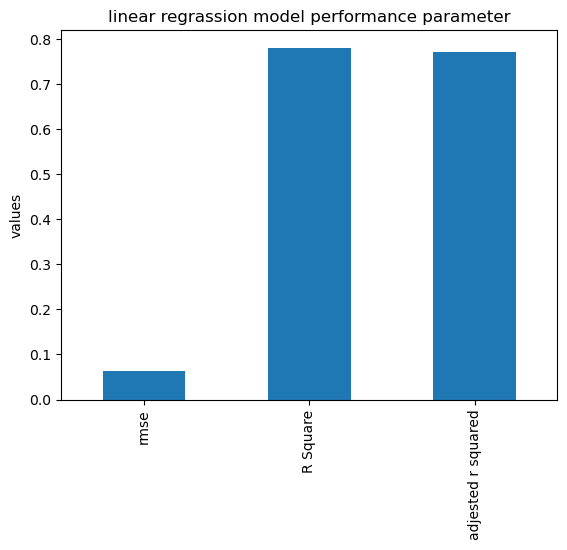

In [109]:
a.LR.plot(kind="bar")
plt.title("linear regrassion model performance parameter")
plt.ylabel("values")

Text(0, 0.5, 'values')

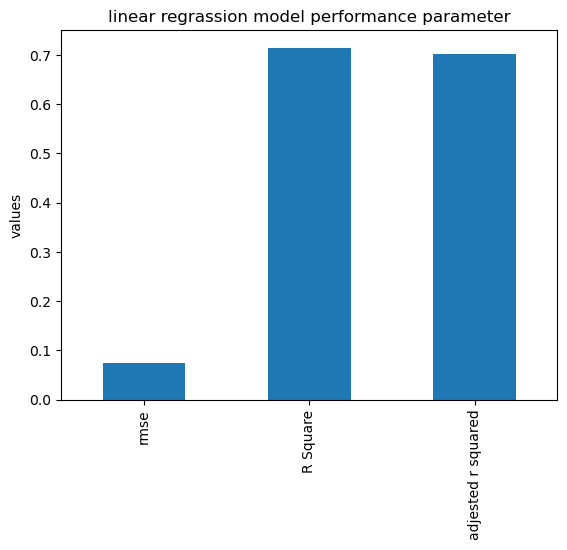

In [111]:
a.DTC.plot(kind="bar")
plt.title("linear regrassion model performance parameter")
plt.ylabel("values")

Text(0, 0.5, 'values')

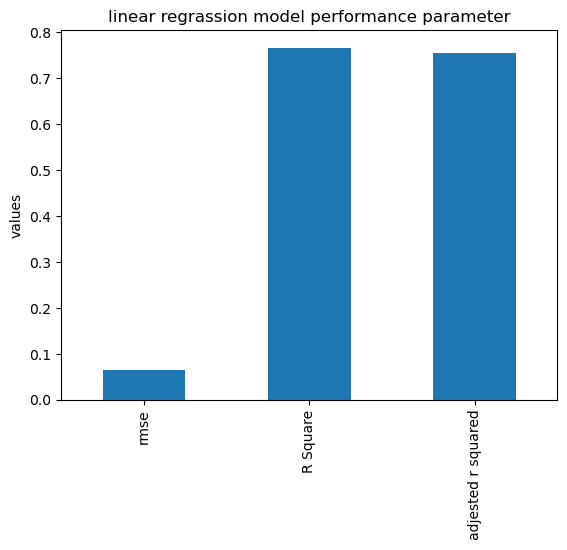

In [113]:
a.RF.plot(kind="bar")
plt.title("linear regrassion model performance parameter")
plt.ylabel("values")

In [135]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"model performance graph {col}")
    #plt.xlabel(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

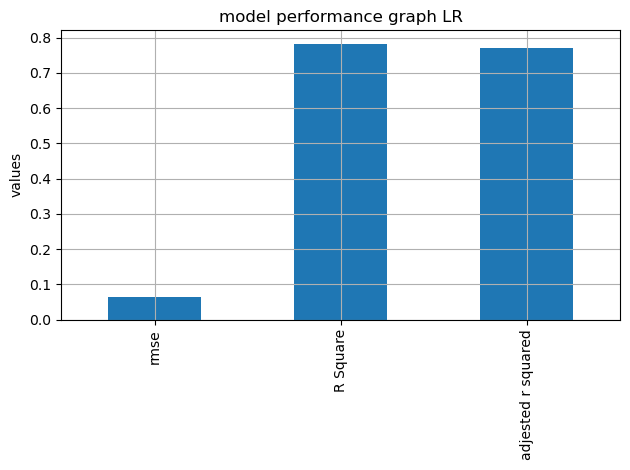

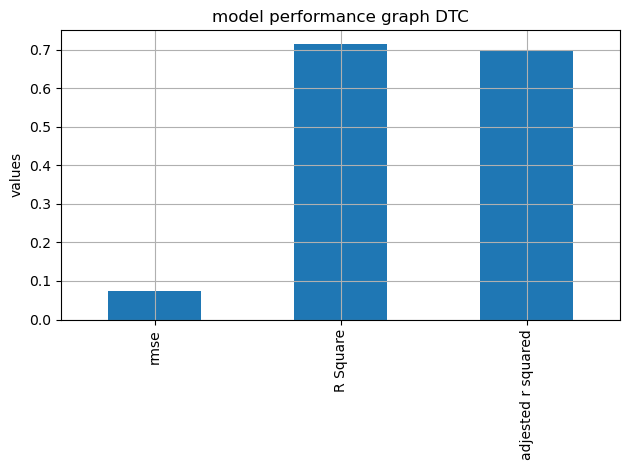

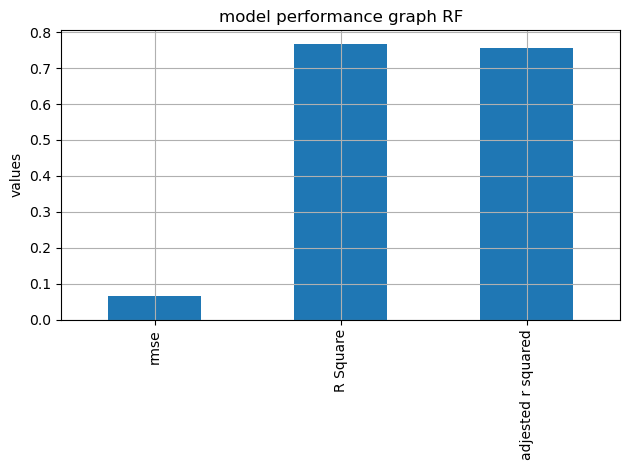

In [137]:
for col in a.columns:
    my_model_plot(col)